# Light Gradient Boosting Machine
\
Official docs: https://lightgbm.readthedocs.io/en/latest/ 


A complete guide how to use LightGBM in Python: https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/


**The main features of the LGBM model are as follows:**

- Higher accuracy and a faster training speed.
- Low memory utilization
- Comparatively better accuracy than other boosting algorithms and handles overfitting much better while working with smaller datasets.
- Parallel Learning support.
- Compatible with both small and large datasets


LGBM Distributed Learning Guide: https://lightgbm.readthedocs.io/en/latest/Parallel-Learning-Guide.html


In [1]:
import os
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Loading the Data :
data = pd.read_csv(
    os.path.join("datasets", "SVMtrain.csv")
)
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB
None
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    Male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4

In [3]:
# train-test split---
x = data.drop(['Embarked', 'PassengerId'], axis=1)
y = data.Embarked
print("x dataset:---")
print(x.head())
print("y dataset:---")
print(y.head())

x dataset:---
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    Male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    Male  35.0      0      0   8.0500
y dataset:---
0    3
1    1
2    3
3    3
4    3
Name: Embarked, dtype: int64


In [4]:
# To define the input and output feature
x = data.drop(['Embarked', 'PassengerId'], axis=1)

In [5]:
x['Sex'] = x['Sex'].astype('category')
y = data.Embarked

In [6]:

# train and test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [7]:
model = lgb.LGBMClassifier(
    learning_rate=0.09, max_depth=-5, random_state=42, verbosity=20)

In [8]:

model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test), (x_train, y_train)],
    eval_metric='logloss'
)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.673529
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.387755
[LightGBM] [Debug] init for col-wise cost 0.001933 seconds, init for row-wise cost 0.000555 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 7
[LightGBM] [Info] Start training from score -1.688081
[LightGBM] [Info] Start training from score -2.418269
[LightGBM] [Info] Start training from score -0.320136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with po

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42, verbosity=20)

In [9]:
print('Training accuracy {:.4f}'.format(model.score(x_train, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test, y_test)))

Training accuracy 0.9866
Testing accuracy 0.8061


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

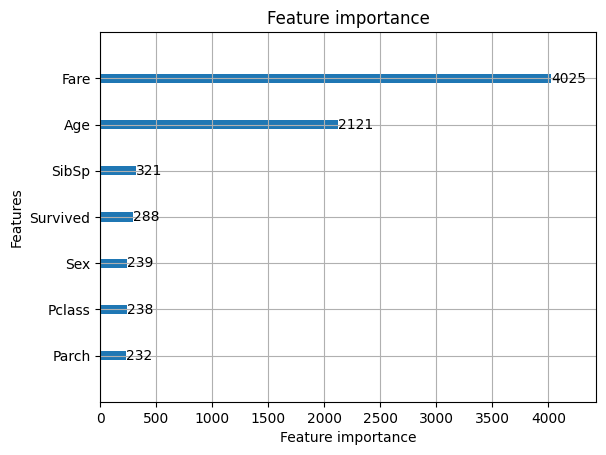

In [10]:
# plot feature importance chart

lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

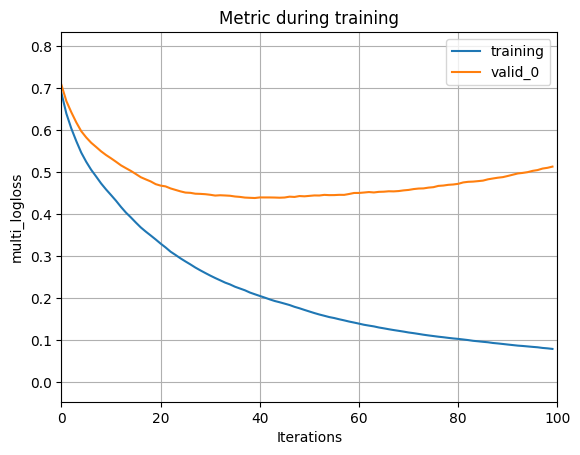

In [11]:
lgb.plot_metric(model)

<Axes: >

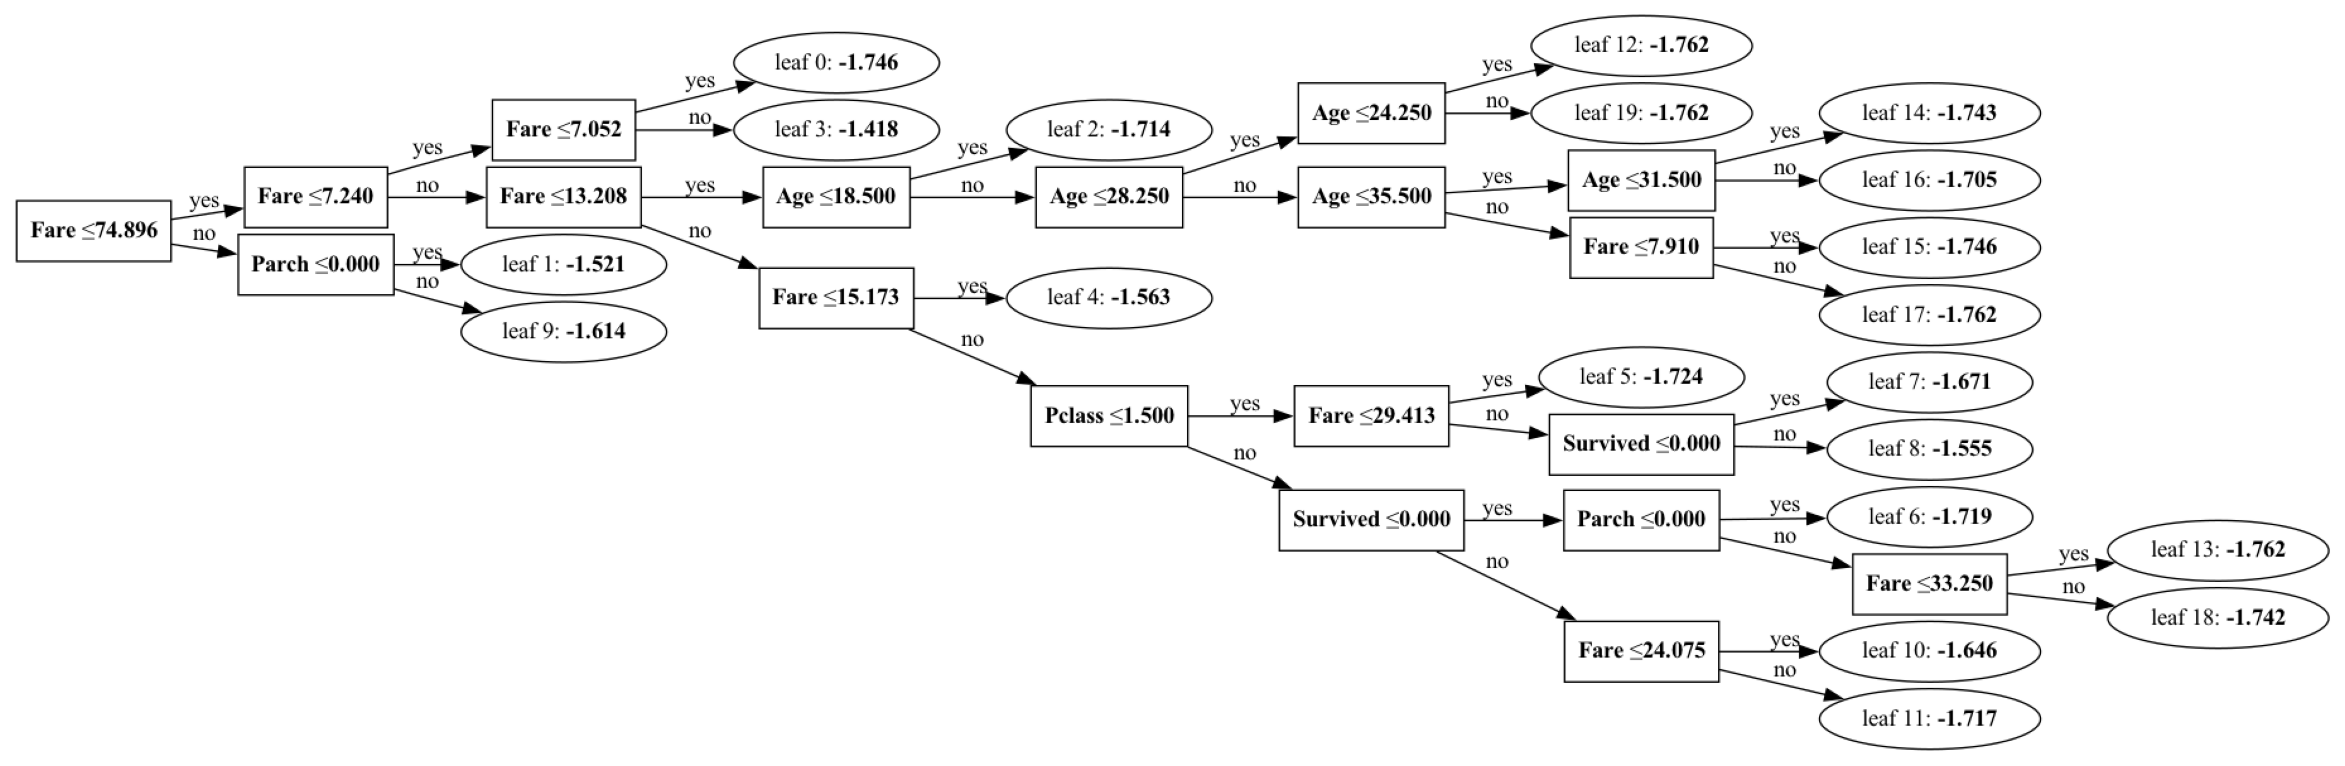

In [12]:
lgb.plot_tree(model, figsize=(30, 40))

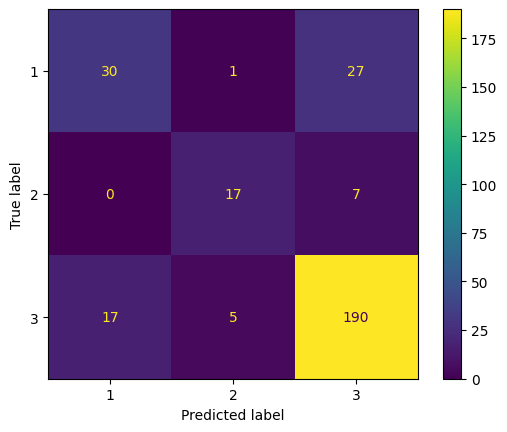

In [17]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test, colorbar='blue')

In [14]:
print(metrics.classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.64      0.52      0.57        58
           2       0.74      0.71      0.72        24
           3       0.85      0.90      0.87       212

    accuracy                           0.81       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.80      0.81      0.80       294

